##Required libraries:

In [ ]:
!pip install opencv-python
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


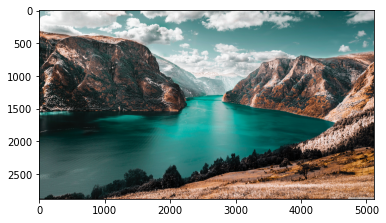

In [ ]:
img = mpimg.imread("/content/example.jpg")
plt.imshow(img)
plt.show()

##GrayScale filter:

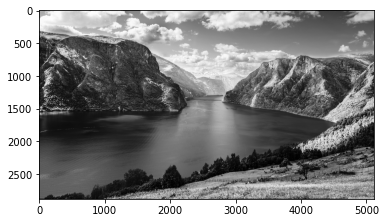

In [ ]:
image = cv2.imread('/content/example.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.show()

## Blur image:

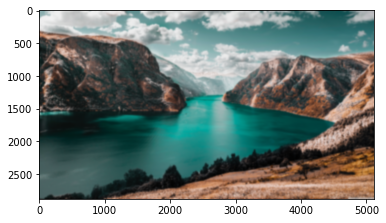

In [ ]:
img = cv2.imread("/content/example.jpg")

blurred_img = cv2.GaussianBlur(img,(65, 65), 0) 
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.show()

## sharpen image:

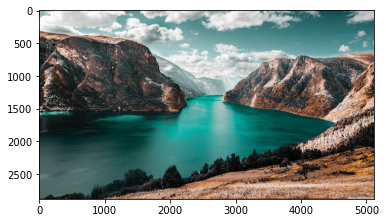

In [ ]:
img = cv2.imread("/content/example.jpg")

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-5, kernel=kernel)
plt.imshow(cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB))
plt.show()

## Perspective Crop:

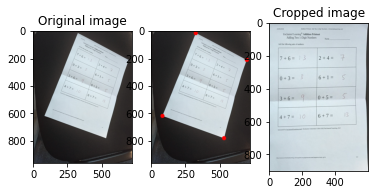

In [ ]:
import cv2
import numpy as np

img = cv2.imread('scan.jpg')

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(img)

img = cv2.imread("scan.jpg")

gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray, (7, 7), 1) 

canny_img = cv2.Canny(blurred_img, 0, 255, apertureSize=3)
contours, h = cv2.findContours(canny_img,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

border_dots = img.copy()
max_area = 0
max_rec = []

for i in contours :
    area = cv2.contourArea(i) 
    peri = cv2.arcLength(i, True) 
    sides = cv2.approxPolyDP(i, 0.02*peri, True)
    if area > max_area and len(sides)==4:
        max_rec = sides
        max_area = area   

border_dots = cv2.drawContours(border_dots, max_rec, -1, 255, 30) 
plt.subplot(1,3,2)
plt.imshow(border_dots)

points =np.float32([[0,0],[0,0],[0,0],[0,0]])
points[0] = np.array((max_rec[0][0][0],max_rec[0][0][1]))
points[1] = np.array((max_rec[3][0][0],max_rec[3][0][1]))
points[2] = np.array((max_rec[2][0][0],max_rec[2][0][1]))
points[3] = np.array((max_rec[1][0][0],max_rec[1][0][1]))

corners = np.float32([[0,0],[600,0],[600,900],[0,900]])
M = cv2.getPerspectiveTransform(points,corners)

final_img = cv2.warpPerspective(img,M,(600,900))

plt.subplot(1,3,3)
plt.title('Cropped image')
plt.imshow(final_img)

plt.show()

output = cv2.imwrite('output.png',final_img)

## Lighten image:

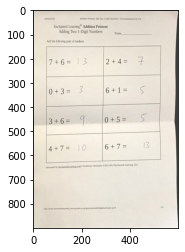

In [ ]:
img = cv2.imread("/content/output.png")

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

bright_image = increase_brightness(img, value=10)
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))

##Enhance Document:

In [ ]:
import ipywidgets

In [ ]:
img = cv2.imread('output.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

slider = ipywidgets.IntSlider(value=200,
                              min=0,
                              max=255,
                              step=1,
                              description='Threshold:',
                              disabled=False,
                              continuous_update=True,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')

def fun(tmin):
  ret, th = cv2.threshold(gray, tmin,255, cv2.THRESH_BINARY)
  plt.imshow(cv2.cvtColor(th,cv2.COLOR_BGR2RGB))
  output = cv2.imwrite('enhanced.png',th)

ipywidgets.interact(fun,tmin=slider);

interactive(children=(IntSlider(value=200, description='Threshold:', max=255), Output()), _dom_classes=('widge…